# Distant mappings

- plot overlap (mark type and directionality)
- select for non-overlapping long reads mapping on different reference locations
- plot primary vs secondary for all
- blast cluster read to see if it matches fim and P-region

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
csv_distant = "../results/distant_mappings.csv"
csv_all = "../results/suppl_reads_info.csv"
df_distant = pd.read_csv(csv_distant)
df_all = pd.read_csv(csv_all)
query_names = []
for q in df_distant.itertuples():
    query_names.append(q.query_name)

distant = []
for q in df_all.itertuples():
    if q.query_name in query_names:
        distant.append(q)

distant_df = pd.DataFrame(distant)
distant_df.to_csv("../results/distant_mappings_info.csv")

In [109]:
def plot_query_to_ref_distant(df, query_name):
    query_df = df[df["query_name"] == query_name]
    query_shift = np.min(query_df["ref_start"])
    i = 0
    for row in query_df.itertuples():
        color = "k"
        if row.type == "secondary":
            color = "b"
        elif row.type == "supplementary":
            color = "r"
        style = "-" if row.is_forward else ":"
        plt.plot([row.query_start, row.query_end],[i,i],c=color,ls=style,lw=10)
        i -= 0.1
    plt.title(query_name)
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    plt.xlabel("Query position")
    #plt.savefig("../results/figures/distant_mapping_{0}.png".format(query_name))
    plt.show()

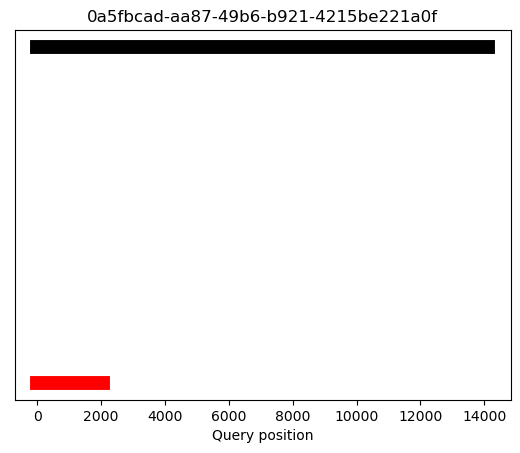

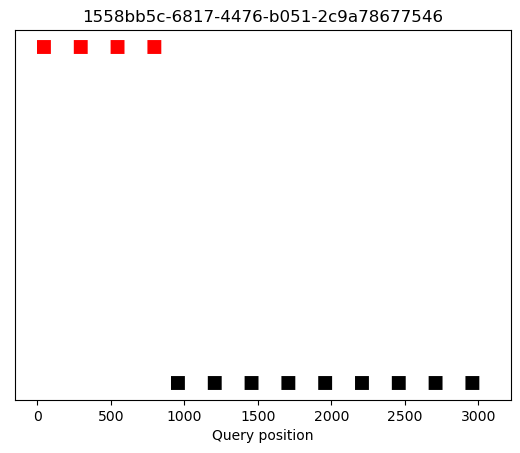

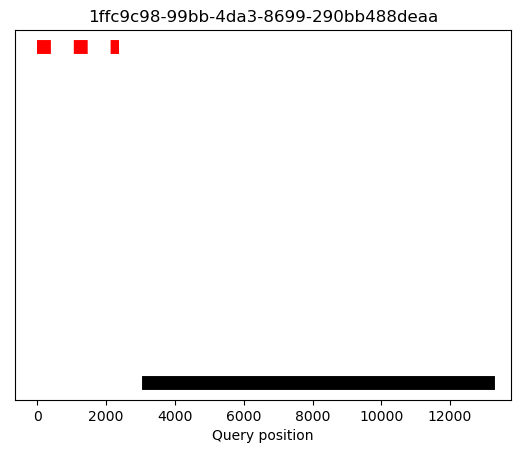

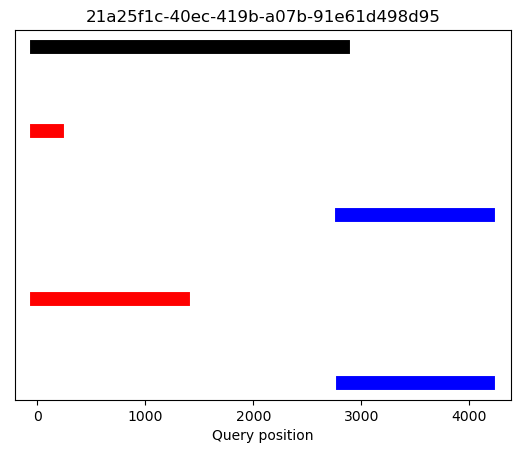

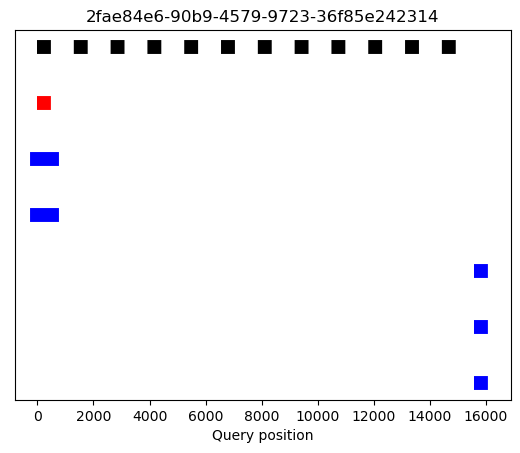

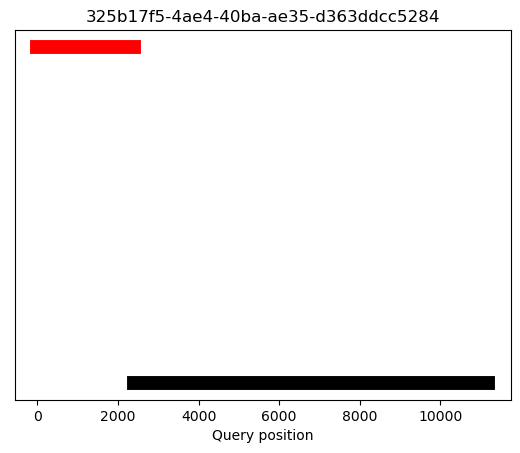

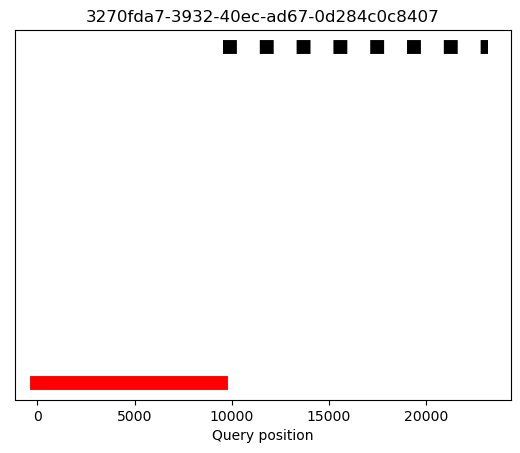

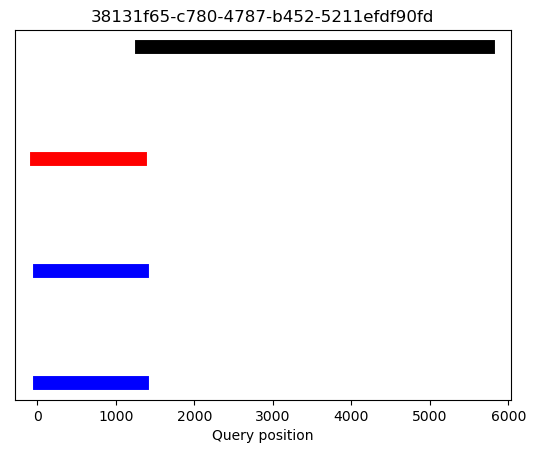

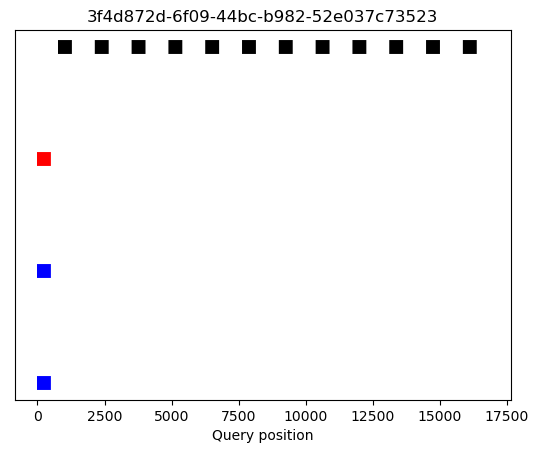

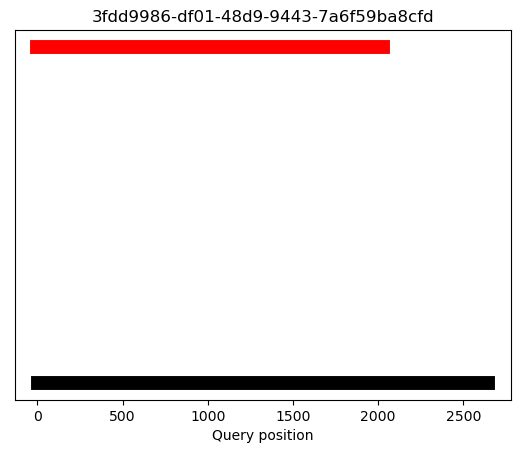

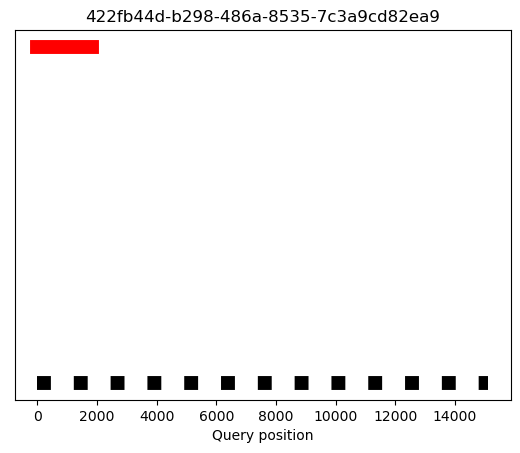

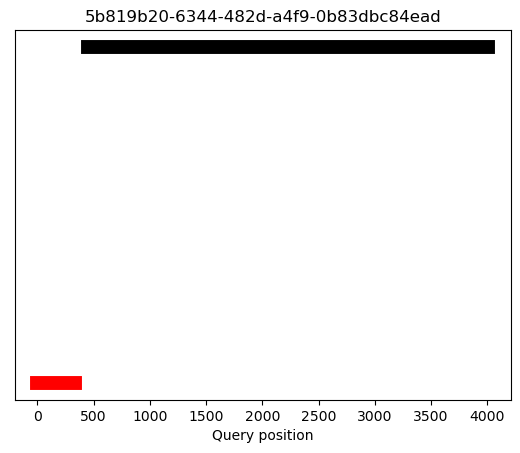

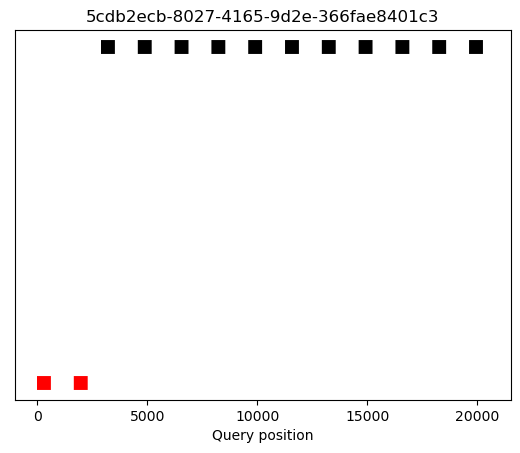

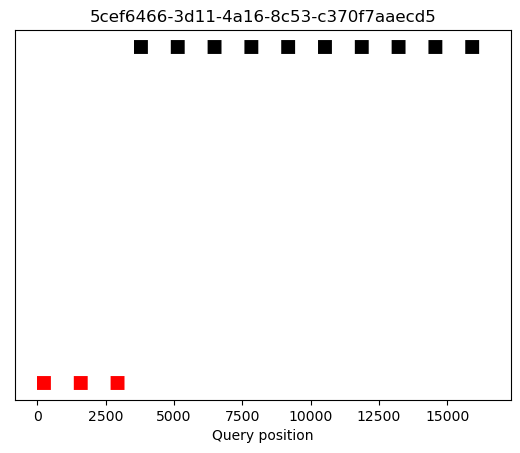

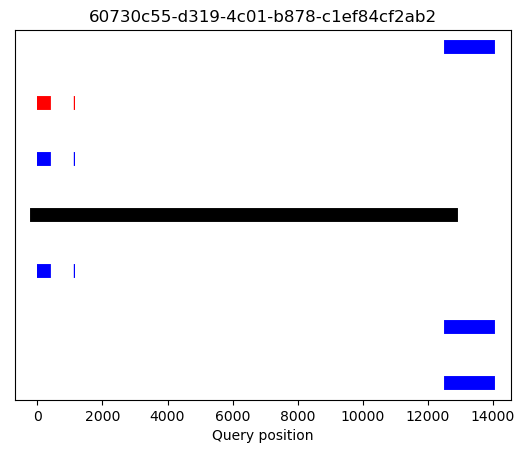

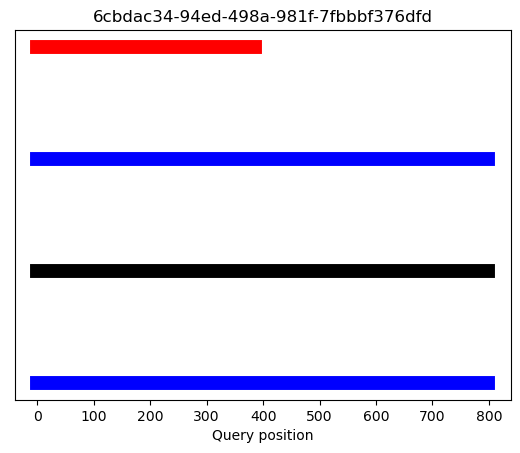

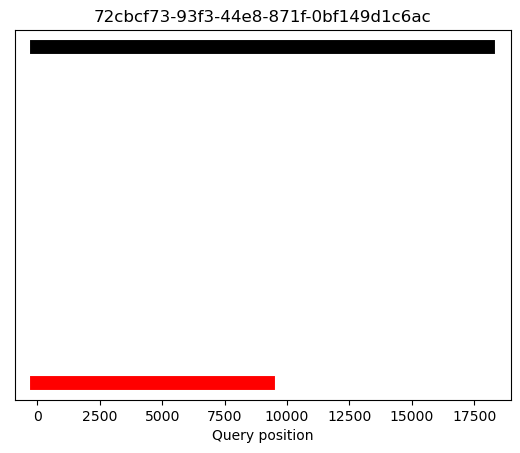

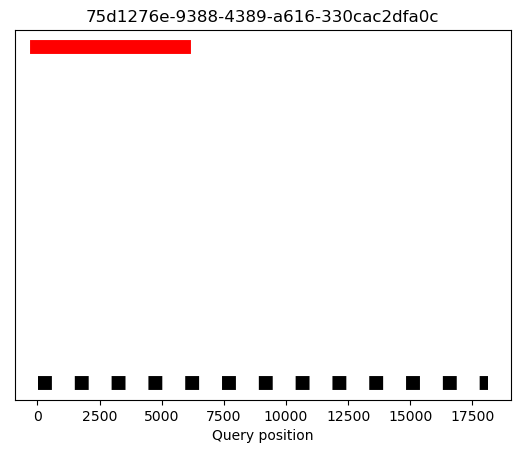

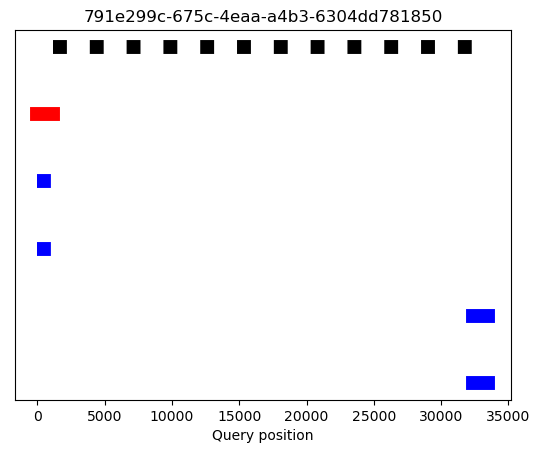

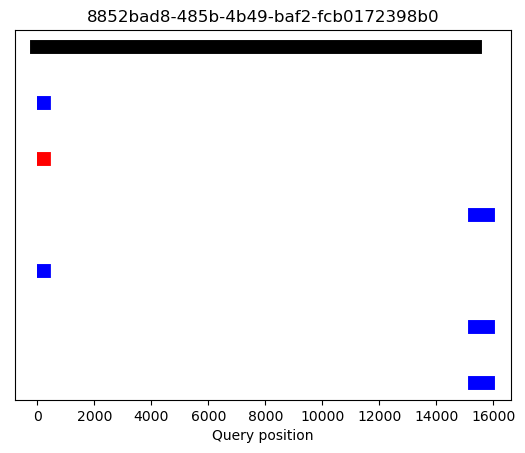

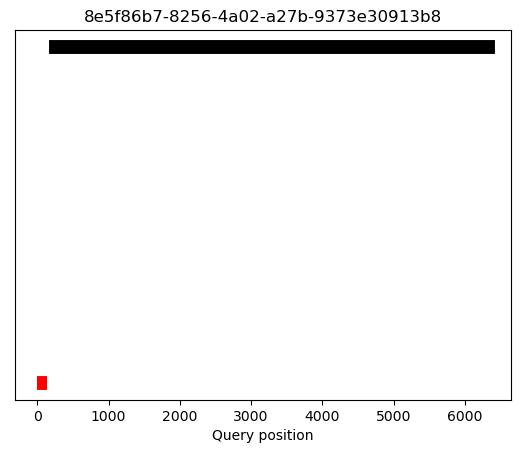

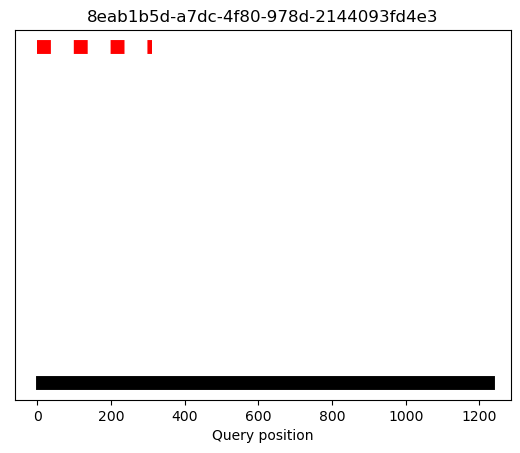

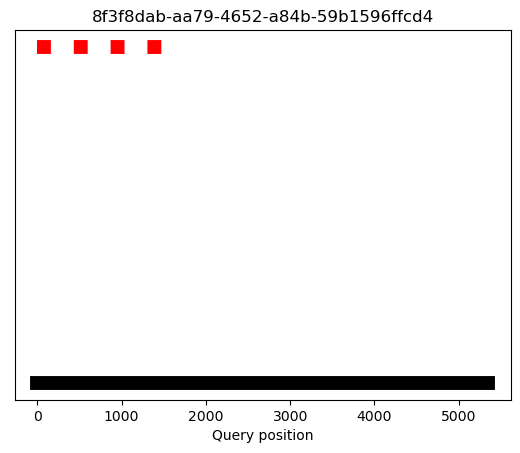

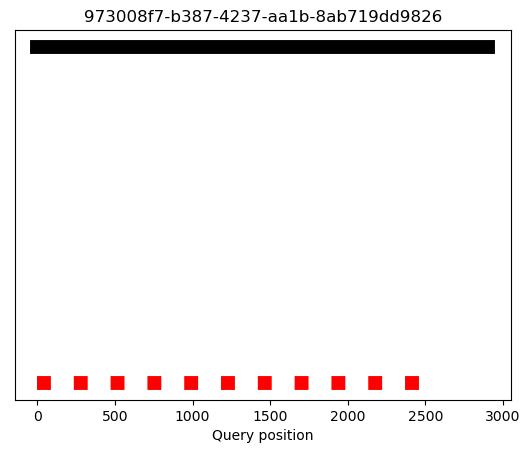

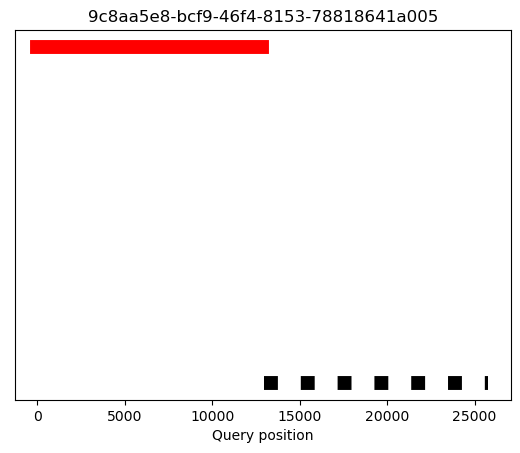

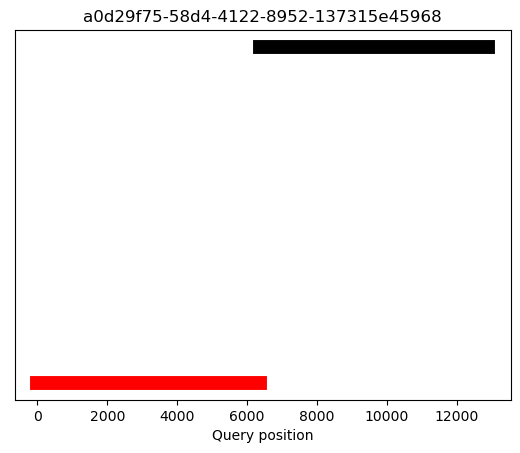

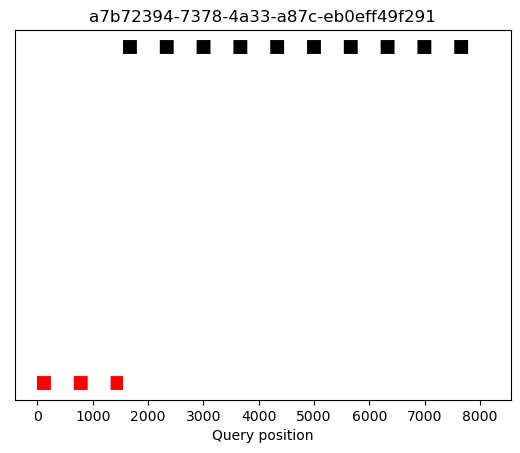

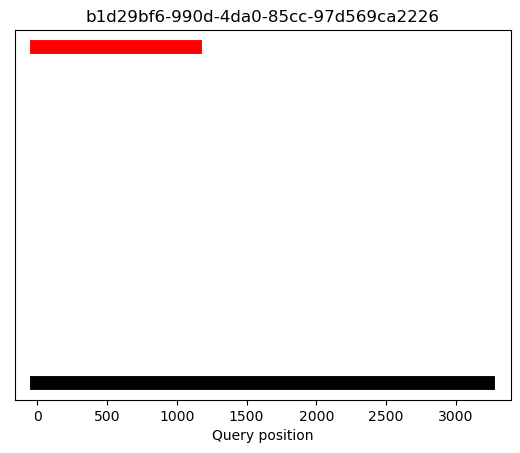

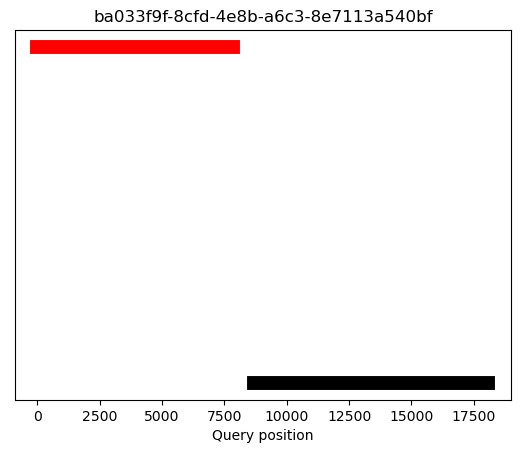

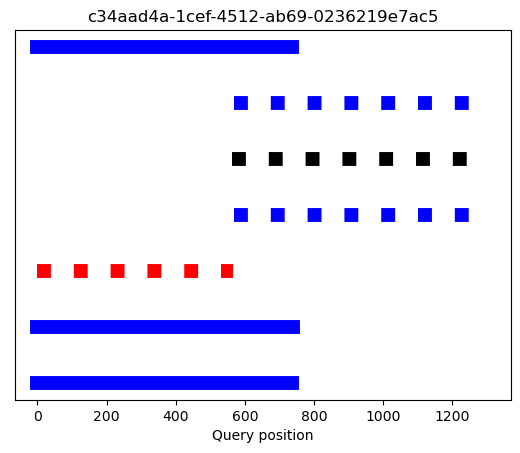

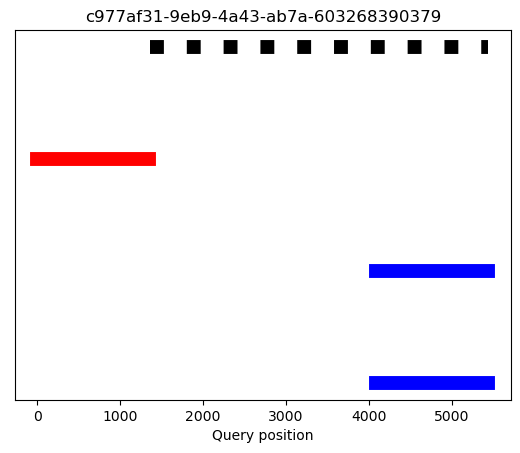

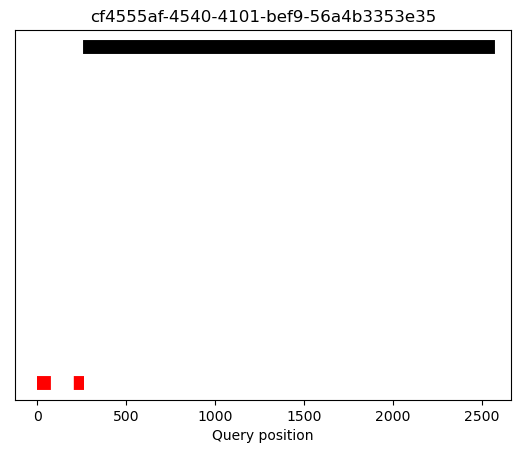

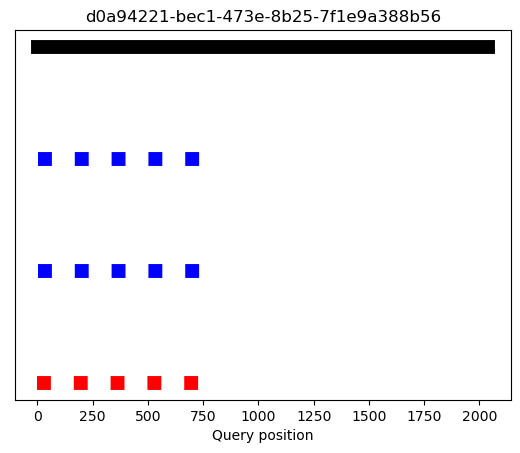

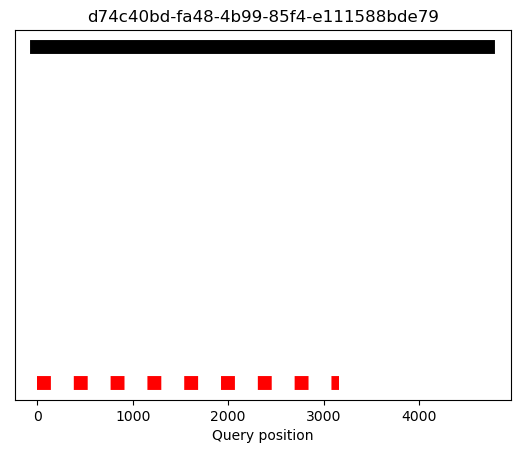

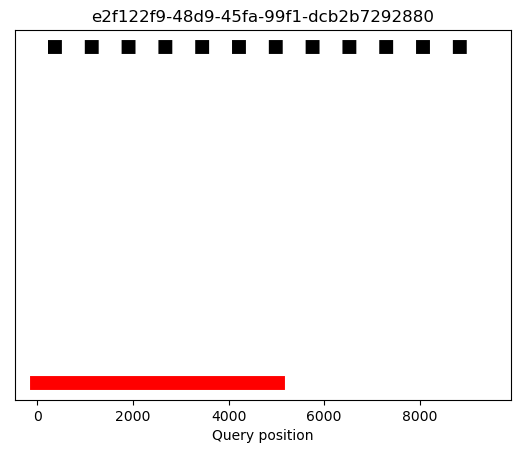

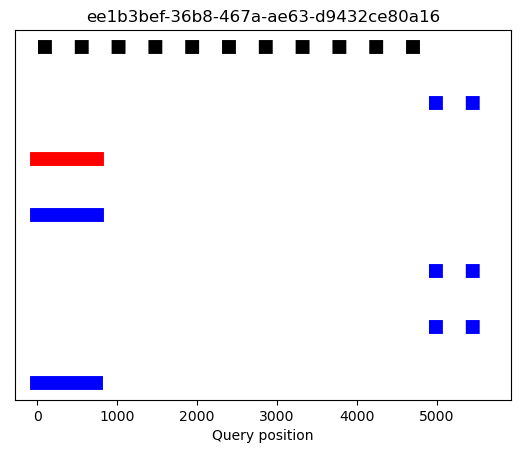

In [110]:
for q in query_names:
    plot_query_to_ref_distant(df_all, q)